<a href="https://colab.research.google.com/github/Agil0509/Deep-Learning/blob/main/NLP_milestone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct
!ls pubmed-rct

fatal: destination path 'pubmed-rct' already exists and is not an empty directory.
PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


In [ ]:
data_dir = '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/'

In [ ]:
import os

file_names = [data_dir + file_name for file_name in os.listdir(data_dir)]
file_names

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

In [ ]:
def get_lines(filename):
  with open(filename,'r') as f:
    return f.readlines()

In [ ]:
train_lines = get_lines(data_dir + 'train.txt')
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [ ]:
len(train_lines)

210040

In [ ]:
def preprocess_text_with_line_numbers(filename):

  input_lines = get_lines(filename) # get all lines from filename
  abstract_lines = "" # create an empty abstract
  abstract_samples = [] # create an empty list of abstracts

  # Loop through each line in target file
  for line in input_lines:
    if line.startswith("###"): # check to see if line is an ID line
      abstract_id = line
      abstract_lines = "" # reset abstract string
    elif line.isspace(): # check to see if line is a new line
      abstract_line_split = abstract_lines.splitlines() # split abstract into separate lines

      # Iterate through each line in abstract and count them at the same time
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {} # create empty dict to store data from line
        target_text_split = abstract_line.split("\t") # split target label from text
        line_data["target"] = target_text_split[0] # get target label
        line_data["text"] = target_text_split[1].lower() # get target text and lower it
        line_data["line_number"] = abstract_line_number # what number line does the line appear in the abstract?
        line_data["total_lines"] = len(abstract_line_split) - 1 # how many total lines are in the abstract? (start from 0)
        abstract_samples.append(line_data) # add line data to abstract samples list

    else: # if the above conditions aren't fulfilled, the line contains a labelled sentence
      abstract_lines += line

  return abstract_samples

In [ ]:
train_samples = preprocess_text_with_line_numbers(data_dir + 'train.txt')
dev_samples = preprocess_text_with_line_numbers(data_dir + 'dev.txt')
test_samples = preprocess_text_with_line_numbers(data_dir + 'test.txt')
len(train_samples)

180040

In [ ]:
train_samples[:5]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

In [ ]:
train_lines = get_lines(data_dir + 'train.txt')
train_lines[:5]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n']

In [ ]:
import pandas as pd

train_df = pd.DataFrame(train_samples)
dev_df = pd.DataFrame(dev_samples)
test_df = pd.DataFrame(test_samples)
train_df

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
...,...,...,...,...
180035,RESULTS,for the absolute change in percent atheroma vo...,7,11
180036,RESULTS,"for pav , a significantly greater percentage o...",8,11
180037,RESULTS,both strategies had acceptable side effect pro...,9,11
180038,CONCLUSIONS,"compared with standard statin monotherapy , th...",10,11


In [ ]:
train_df['target'].value_counts()

,count
target,
METHODS,59353
RESULTS,57953
CONCLUSIONS,27168
BACKGROUND,21727
OBJECTIVE,13839


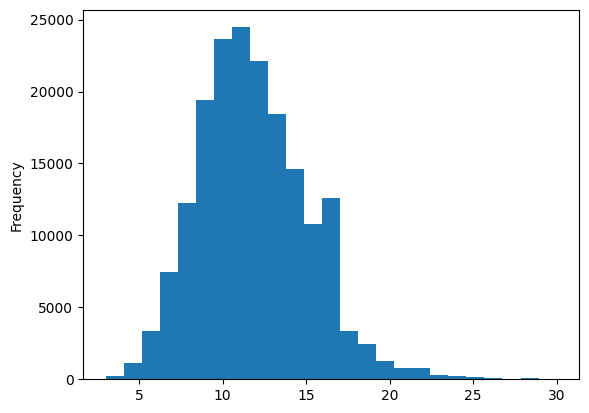

In [ ]:
train_df['total_lines'].plot.hist(bins = 25);

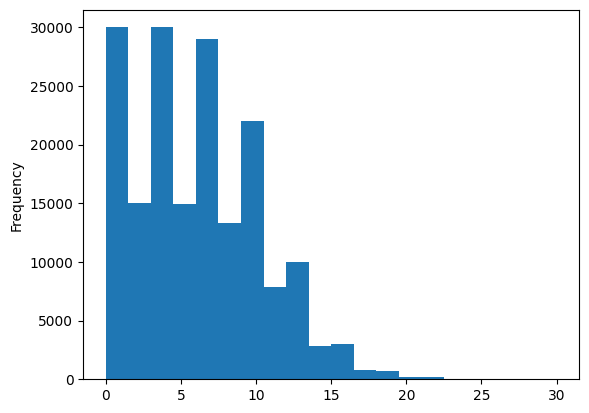

In [ ]:
train_df['line_number'].plot.hist(bins = 20);

In [ ]:
train_sentences = train_df['text'].to_list()
val_sentences = dev_df['text'].to_list()
test_sentences = test_df['text'].to_list()

train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

In [ ]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse_output = False)

train_labels_one_hot = one_hot_encoder.fit_transform(train_df['target'].to_numpy().reshape(-1,1))
dev_labels_one_hot = one_hot_encoder.transform(dev_df['target'].to_numpy().reshape(-1,1))
test_labels_one_hot = one_hot_encoder.transform(test_df['target'].to_numpy().reshape(-1,1))

train_labels_one_hot[0]

array([0., 0., 0., 1., 0.])

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

train_labels_encoded = label_encoder.fit_transform(train_df['target'].to_numpy())
val_labels_encoded = label_encoder.transform(dev_df['target'].to_numpy())
test_labels_encoded = label_encoder.transform(test_df['target'].to_numpy())

train_labels_encoded[:5]

array([3, 2, 2, 2, 2])

In [ ]:
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ('Tv-idf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

model_0.fit(
    X = train_sentences,
    y = train_labels_encoded
)

Pipeline(steps=[('Tv-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
model_0.score(val_sentences,val_labels_encoded)

0.7218323844829869

In [ ]:
baseline_pred = model_0.predict(val_sentences)
baseline_pred

array([4, 1, 3, ..., 4, 4, 1])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy_score(val_labels_encoded,baseline_pred)

0.7218323844829869

In [ ]:
precision_score(val_labels_encoded,baseline_pred, average = None).mean()

0.706976684427677

In [ ]:
recall_score(val_labels_encoded,baseline_pred, average = None).mean()

0.5878501847023443

In [ ]:
import tensorflow as tf
import numpy as np

sent_len = [len(sentence.split()) for sentence in train_sentences]
np.mean(sent_len)

26.338269273494777

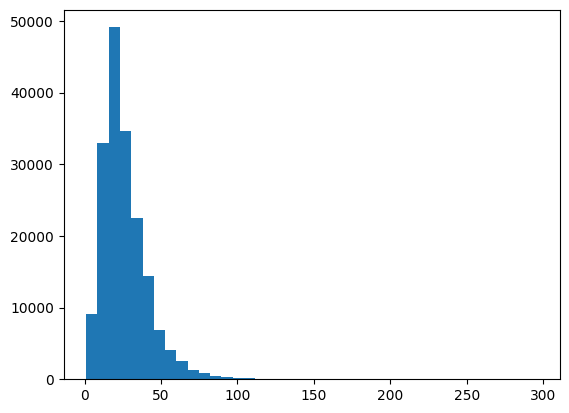

In [ ]:
import matplotlib.pyplot as plt

plt.hist(sent_len, bins = 40);

In [ ]:
output_seq_len = int(np.percentile(sent_len, 95))
output_seq_len

55

In [ ]:
max_tokens = 68000

text_vectorizer  = tf.keras.layers.TextVectorization(max_tokens=max_tokens,
                                                     output_sequence_length = output_seq_len,
                                                     pad_to_max_tokens = True)

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
text_vectorizer.get_vocabulary()[:20]

['',
 '[UNK]',
 'the',
 'and',
 'of',
 'in',
 'to',
 'with',
 'a',
 'were',
 'was',
 'for',
 'patients',
 'group',
 'p',
 'at',
 'or',
 'study',
 'on',
 'treatment']

In [ ]:
import random
random_sentences = random.choice(train_sentences)
text_vectorizer([random_sentences]), random_sentences

(<tf.Tensor: shape=(1, 55), dtype=int64, numpy=
 array([[1815, 6069,  321,    4,    2,  269,  625,  330,    7, 3646,   22,
            8,   97,   77, 2285,   11,   41,   44,  161,  321,    4, 5199,
          159, 3646,   22,    8,   97,   77, 2285,   11,   41,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0]])>,
 'twelve once-weekly doses of the combination drugs , given with supervision by a health care professional , for @ months vs @ daily doses of isoniazid , without supervision by a health care professional , for @ months .')

In [ ]:
len(text_vectorizer.get_vocabulary())

64841

In [ ]:
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
rct_20k_text_vocab[:10]

['', '[UNK]', 'the', 'and', 'of', 'in', 'to', 'with', 'a', 'were']

In [ ]:
token_embedding= tf.keras.layers.Embedding(
    input_dim=len(rct_20k_text_vocab),
    output_dim = 128,
    mask_zero = True,
    name = 'token_embedding'
    )

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences,train_labels_one_hot))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences,dev_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences,test_labels_one_hot))

train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [ ]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
inputs = tf.keras.layers.Input(shape = (1,), dtype = tf.string)
x = text_vectorizer(inputs)
x = token_embedding(x)
x = tf.keras.layers.Conv1D(64,5,padding = 'same',activation = 'relu')(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs = tf.keras.layers.Dense(units = num_classes,activation = 'softmax')(x)

model_1 =  tf.keras.models.Model(inputs = [inputs], outputs = [outputs])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'conv1d_16' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [ ]:
model_1.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)          │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 55)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ token_embedding (Embedding)          │ (None, 55, 128)             │       8,299,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_16 (Conv1D)                   │ (None, 55, 64)              │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,340,997 (31.82 MB)

 Trainable params: 8,340,997 (31.82 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_1.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

In [ ]:
history = model_1.fit(train_dataset,
                      steps_per_epoch = int(0.1 * len(train_dataset)),
                      epochs = 3,
                      validation_data = val_dataset,
                      validation_steps = int(0.1 * len(val_dataset)))

Epoch 1/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 52s 89ms/step - accuracy: 0.5216 - loss: 1.1748 - val_accuracy: 0.7380 - val_loss: 0.6927
Epoch 2/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 47s 83ms/step - accuracy: 0.7448 - loss: 0.6864 - val_accuracy: 0.7630 - val_loss: 0.6374
Epoch 3/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 46s 83ms/step - accuracy: 0.7677 - loss: 0.6263 - val_accuracy: 0.7876 - val_loss: 0.5958


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

# Define a custom layer
class MyLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(MyLayer, self).__init__(**kwargs)
        self.sentence_encoder_layer = hub.KerasLayer(
            'https://tfhub.dev/google/universal-sentence-encoder/4',
            dtype=tf.string,
            trainable=False,
            name='USE'
        )

    def call(self, inputs):
        return self.sentence_encoder_layer(inputs)

# Define the inputs and use the custom layer
inputs = tf.keras.layers.Input(shape=(), dtype=tf.string, name='input_text')
use_output = MyLayer()(inputs)

# Add Dense layers
x = tf.keras.layers.Dense(units=128, activation='relu')(use_output)
outputs = tf.keras.layers.Dense(units=5, activation='softmax')(x)

# Build the model
model_2 = tf.keras.models.Model(inputs=inputs, outputs=outputs)

# Compile the model
model_2.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Display the model summary
model_2.summary()


Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_text (InputLayer)              │ (None)                      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ my_layer_1 (MyLayer)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 66,309 (259.02 KB)

 Trainable params: 66,309 (259.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model_2.fit(train_dataset,
                      steps_per_epoch = int(0.1 * len(train_dataset)),
                      epochs = 3,
                      validation_data = val_dataset,
                      validation_steps = int(0.1 * len(val_dataset)))

Epoch 1/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.5788 - loss: 1.0989 - val_accuracy: 0.6905 - val_loss: 0.7948
Epoch 2/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7043 - loss: 0.7717 - val_accuracy: 0.7084 - val_loss: 0.7568
Epoch 3/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7138 - loss: 0.7546 - val_accuracy: 0.7207 - val_loss: 0.7275


In [ ]:
model_2.evaluate(val_dataset)

945/945 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.7140 - loss: 0.7388


[0.7408186793327332, 0.7139216065406799]

In [ ]:
model_2_preds = np.argmax(model_2.predict(val_dataset),axis = 1)
model_2_preds[:10]

945/945 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step


array([0, 1, 3, 2, 4, 2, 2, 4, 4, 1])

In [ ]:
val_labels_encoded[:10]

array([0, 0, 3, 2, 2, 4, 4, 4, 4, 1])

In [ ]:
np.mean((model_2_preds==val_labels_encoded))

0.7139216205481266

#Character level Tokenizer

In [ ]:
def split_char(text):
  return ' '.join(list(text))

In [ ]:
train_chars = [split_char(sentence) for sentence in train_sentences]
val_chars = [split_char(sentence) for sentence in val_sentences]
test_chars = [split_char(sentence) for sentence in test_sentences]

train_chars[0]

't o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .'

In [ ]:
import numpy as np
import tensorflow as tf

# Convert the list to a NumPy array
train_chars_array = np.array(train_chars)
print(train_chars_array.shape)


(180040,)


In [ ]:
train_labels_encoded.shape

(180040,)

In [ ]:
train_sentences[0]

'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .'

In [ ]:
char_len = [len(s) for s in train_sentences]
np.mean(char_len)

149.3662574983337

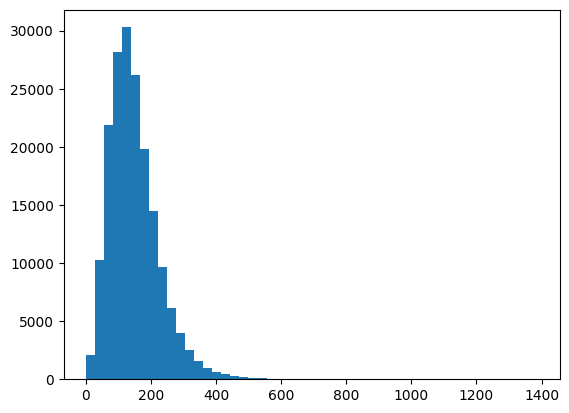

In [ ]:
import matplotlib.pyplot as plt

plt.hist(char_len, bins = 50);

In [ ]:
output_seq_char_len = np.percentile(char_len, 95)
output_seq_char_len

290.0

In [ ]:
import string

alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
NUM_TOKENS = len(alphabet) + 2  # 2 for space and OOV token (OOV = out of vocabulary)
char_vectorizer = tf.keras.layers.TextVectorization(max_tokens = NUM_TOKENS,
                                             standardize = 'lower_and_strip_punctuation',
                                             output_sequence_length = int(output_seq_char_len),
                                             name = 'char_vectorizer')

In [ ]:
char_vectorizer.adapt(train_chars)

In [ ]:
char_vocab = char_vectorizer.get_vocabulary()
char_vocab, len(char_vocab)

(['',
  '[UNK]',
  'e',
  't',
  'i',
  'a',
  'n',
  'o',
  'r',
  's',
  'd',
  'c',
  'l',
  'h',
  'p',
  'm',
  'u',
  'f',
  'g',
  'y',
  'w',
  'v',
  'b',
  'k',
  'x',
  'z',
  'q',
  'j'],
 28)

In [ ]:
val_chars[555]

't h e   p u r p o s e   o f   t h e   p r e s e n t   s t u d y   i s   t o   e v a l u a t e   t h e   i m p a c t   o f   a   h e a l t h   p s y c h o l o g y - l e d   b a r i a t r i c   r e h a b i l i t a t i o n   s e r v i c e   (   b r s   )   o n   p a t i e n t   w e i g h t   l o s s   f o l l o w i n g   b a r i a t r i c   s u r g e r y   a t   @   y e a r   .'

In [ ]:

char_vectorizer([val_chars[555]])

<tf.Tensor: shape=(1, 290), dtype=int64, numpy=
array([[ 3, 13,  2, 14, 16,  8, 14,  7,  9,  2,  7, 17,  3, 13,  2, 14,
         8,  2,  9,  2,  6,  3,  9,  3, 16, 10, 19,  4,  9,  3,  7,  2,
        21,  5, 12, 16,  5,  3,  2,  3, 13,  2,  4, 15, 14,  5, 11,  3,
         7, 17,  5, 13,  2,  5, 12,  3, 13, 14,  9, 19, 11, 13,  7, 12,
         7, 18, 19, 12,  2, 10, 22,  5,  8,  4,  5,  3,  8,  4, 11,  8,
         2, 13,  5, 22,  4, 12,  4,  3,  5,  3,  4,  7,  6,  9,  2,  8,
        21,  4, 11,  2, 22,  8,  9,  7,  6, 14,  5,  3,  4,  2,  6,  3,
        20,  2,  4, 18, 13,  3, 12,  7,  9,  9, 17,  7, 12, 12,  7, 20,
         4,  6, 18, 22,  5,  8,  4,  5,  3,  8,  4, 11,  9, 16,  8, 18,
         2,  8, 19,  5,  3, 19,  2,  5,  8,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0, 

##Character level Embedding

In [ ]:
char_embed = tf.keras.layers.Embedding(input_dim = len(char_vocab),
                                       output_dim = 25,
                                       mask_zero = True,
                                       name = 'char_embed')

In [ ]:
char_embed(char_vectorizer([val_chars[555]]))

<tf.Tensor: shape=(1, 290, 25), dtype=float32, numpy=
array([[[-0.03063042,  0.01008664, -0.00588621, ...,  0.01048254,
         -0.01332932,  0.00741942],
        [-0.03812904,  0.02579352,  0.02226632, ..., -0.02330986,
         -0.0081672 , -0.02291309],
        [ 0.01233141,  0.00131223,  0.04624954, ..., -0.0089787 ,
          0.00582317,  0.02683485],
        ...,
        [-0.01122769, -0.00281584,  0.00941328, ..., -0.03849775,
         -0.01549418, -0.01362616],
        [-0.01122769, -0.00281584,  0.00941328, ..., -0.03849775,
         -0.01549418, -0.01362616],
        [-0.01122769, -0.00281584,  0.00941328, ..., -0.03849775,
         -0.01549418, -0.01362616]]], dtype=float32)>

#Prepare dataset

In [ ]:
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars,train_labels_one_hot))
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars,dev_labels_one_hot))
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars,test_labels_one_hot))

train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
train_labels_one_hot.shape

(180040, 5)

In [ ]:
train_char_dataset = train_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = val_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = test_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
for x,y in train_char_dataset.take(1):
  print(x.shape)
  print(y.shape)

(32,)
(32, 5)


#Building a Conv1D model with character embeddings

In [ ]:
inputs = tf.keras.layers.Input(shape = (), dtype = tf.string)
vectorized_layer = char_vectorizer(inputs)
embed_layer = char_embed(vectorized_layer)
x = tf.keras.layers.Conv1D(64, kernel_size = 5, padding = 'same',activation = 'relu')(embed_layer)
x = tf.keras.layers.GlobalMaxPooling1D()(x)
outputs = tf.keras.layers.Dense(units = len(class_names), activation = 'softmax')(x)

model_3 = tf.keras.models.Model(inputs = inputs, outputs = outputs)

model_3.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_3.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'conv1d_18' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)          │ (None)                      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ char_vectorizer (TextVectorization)  │ (None, 290)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ char_embed (Embedding)               │ (None, 290, 25)             │             700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_18 (Conv1D)                   │ (None, 290, 64)             │           8,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_15              │ (None, 64)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,089 (35.50 KB)

 Trainable params: 9,089 (35.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_3 = model_3.fit(train_char_dataset,
                        steps_per_epoch = int(0.1 * len(train_char_dataset)),
                        epochs = 3,
                        validation_data = val_char_dataset,
                        validation_steps = int(0.1 * len(val_char_dataset)))

Epoch 1/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.4423 - loss: 1.3847 - val_accuracy: 0.6024 - val_loss: 1.0315
Epoch 2/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.5842 - loss: 1.0272 - val_accuracy: 0.6373 - val_loss: 0.9301
Epoch 3/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.6351 - loss: 0.9302 - val_accuracy: 0.6559 - val_loss: 0.8788


In [ ]:
model_3.evaluate(val_char_dataset)

945/945 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.6603 - loss: 0.8723


[0.8773870468139648, 0.6595061421394348]

In [ ]:
model_3_preds = tf.argmax(model_3.predict(val_char_dataset),axis = 1)
model_3_preds[:10]

945/945 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([1, 1, 1, 2, 2, 2, 2, 1, 4, 1])>

In [ ]:
val_labels_encoded[:10]

array([0, 0, 3, 2, 2, 4, 4, 4, 4, 1])